In [ ]:
%%html
<style>

.rendered_html {
  font-size:1.5em;
}

.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 200%;
}

</style>

In [30]:
from bokeh.themes import Theme
from bokeh.io import curdoc
theme = Theme(filename="./theme.yaml")
#curdoc().theme = theme

# Interactive Visualizations with Python

### Madpy Meetup
January 9, 2020

### About Me

- Zach Griffith
- Software Developer for the Space Science and Engineering Center at UW-Madison
- zdgriffith on GitHub

## Outline

- Bokeh
    - why?
    - The Bokeh Model
    - Plot Tools
    - Layouts
    - Syncing Plot Elements
    - Widgets
    - Callbacks
    - Bokeh Server
- Higher Level Packages built on Bokeh
    - Holoviews
    - Geoviews
    - Panel
- Alternatives (Plotly, Altair)
- Summary
- References
- Resources

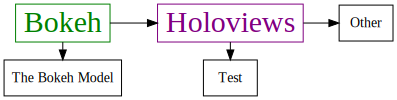

In [31]:
from graphviz import Digraph

dot = Digraph(comment='Outline')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')

with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('1', 'Bokeh', fontsize='30', color='green', fontcolor='green')
    c.node('1a', 'The Bokeh Model')
    c.edge('1', '1a')
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('2', 'Holoviews', fontsize='30', color='purple', fontcolor='purple')
    c.node('2a', 'Test')
    c.edge('2', '2a')
with dot.subgraph() as c:
    c.attr(rank='same')
    c.node('3', 'Other')
dot.edges(['12', '23'])
dot

# Part 1:  The Bokeh Model and Basic Plotting

# Why Bokeh

- Write entirely in Python - No JavaScript! <span style="font-size:small;">most of the time...</span>

- Built to work well with PyData Tools (e.g. Pandas)

- Supports variety of output formats
    - Jupyter Notebook
    - Standalone HTML
    - Web Applications via Bokeh Server

In [32]:
from bokeh.io import output_file, output_notebook

#output_file('output.html')
output_notebook()

Loading BokehJS ...

# The Bokeh Model

In [33]:
'''
from graphviz import Digraph

dot = Digraph(comment='The Bokeh Model')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')
with dot.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('A', 'Python Objects')
    c.attr(label='Bokeh')
dot.node('B', 'JSON')

with dot.subgraph(name='cluster_1') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.node('C', 'JavaScript Objects')
    c.attr(label='BokehJS')
dot.node('D', 'HTML/SVG Output')
dot.edges(['AB', 'BC', 'CD'])
dot.format = 'svg'
'''

"\nfrom graphviz import Digraph\n\ndot = Digraph(comment='The Bokeh Model')\ndot.attr('node', shape='rectangle')\ndot.attr(rankdir='LR')\nwith dot.subgraph(name='cluster_0') as c:\n    c.attr(style='filled', color='lightgrey')\n    c.node_attr.update(style='filled', color='white')\n    c.node('A', 'Python Objects')\n    c.attr(label='Bokeh')\ndot.node('B', 'JSON')\n\nwith dot.subgraph(name='cluster_1') as c:\n    c.attr(style='filled', color='lightgrey')\n    c.node_attr.update(style='filled', color='white')\n    c.node('C', 'JavaScript Objects')\n    c.attr(label='BokehJS')\ndot.node('D', 'HTML/SVG Output')\ndot.edges(['AB', 'BC', 'CD'])\ndot.format = 'svg'\n"

<center>
    <img src="images/bokeh_model.svg"
         align="center"
         width="100%">
</center>
All low-level Bokeh Python objects are serialized to JSON:

In [34]:
from bokeh.models import Line
line = Line(x=1, y=2, line_color='orange', line_width=4)
line.to_json(include_defaults=False)

{'id': '2441',
 'line_color': 'orange',
 'line_width': 4,
 'x': {'value': 1},
 'y': {'value': 2}}

# Mapping Visual Attributes to Data Columns

In [35]:
from bokeh.models import ColumnDataSource

source = ColumnDataSource({
    'x': [...], # Columns can be any sequence
    'y': [...], # (e.g. list, numpy array, pandas series...)
})

Intialize with a dictionary, Pandas DataFrame, or Pandas GroupBy

In [91]:
from bokeh.models import Plot
from bokeh.plotting import show
import numpy as np

x = np.arange(0, 6*np.pi, 0.2)
source = ColumnDataSource({
    'x': x,
    'y': np.sin(x)
})

# plotting with the bokeh.models API
p = Plot(height=200)
line = Line(x='x', y='y')
p.add_glyph(source, line)
show(p)

In [90]:
from bokeh.plotting import figure
# plotting with the bokeh.plotting API

p = figure(height=200) # Create Plot instance with some defaults
p.line(source=source, x='x', y='y')
show(p)

# Glyphs

In [38]:
p = figure(height=200)
p.step(source=source, x='x', y='y')
show(p)

In [39]:
p = figure(height=200)
p.square(source=source, x='x', y='y')
show(p)

In [40]:
p = figure(height=200)
p.vbar(source=source, x='x', top='y', width=0.2)
show(p)

In [41]:
p = figure(height=200)
p.annular_wedge(source=source, x='x', y='y', inner_radius=0.1, outer_radius=0.25, start_angle=0.2, end_angle=5)
show(p)

See full list at:  https://docs.bokeh.org/en/latest/docs/reference/models/glyphs.html

# Part 2:  Adding Interactions

In [97]:
import pandas as pd
df = pd.read_csv('Data/nba_players_2019.csv')
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP.1',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [98]:
source = ColumnDataSource(df)
p = figure(title='2019-20 NBA Players')
p.xaxis.axis_label = 'Minutes Per Game'
p.yaxis.axis_label = 'Points Per Game'
p.circle(source=source, x='MP', y='PTS', alpha=0.5)
show(p)

# Widgets

In [45]:
from bokeh.models.widgets import Button, CheckboxGroup, Slider

button = Button(label='Woo MadPy', button_type='success')
show(button)

In [46]:

checkbox_group = CheckboxGroup(
        labels=["Python", "JavaScript", "Stuff"], active=[0, 1])
show(checkbox_group)

In [47]:
slider = Slider(start=0, end=11, value=11, step=0.1, title='MadPy Volume')
show(slider)

In [48]:
slider.to_json(include_defaults=False)

{'callback': None,
 'end': 11,
 'id': '4345',
 'start': 0,
 'step': 0.1,
 'title': 'MadPy Volume',
 'value': 11}

See full list of widgets at:  https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html

# Organizing Multiple Visual Elements

Plots and Widgets are Layout objects which can be placed using functions from the layouts module

In [77]:
from bokeh.layouts import widgetbox, row, gridplot, layout
from bokeh.models.widgets import Select

values = list(source.data)
x_select = Select(title='X-Axis', options=values, value='MP')
y_select = Select(title='Y-Axis', options=values, value='PTS')

# Creates Column of widgets with predefined styling
widget_box = widgetbox([x_select, y_select])

p = figure(title='2019-20 NBA Players')
p.xaxis.axis_label = 'Minutes Per Game'
p.yaxis.axis_label = 'Points Per Game'
p.circle(source=source, x='MP', y='PTS', alpha=0.5)

# Create a Row of Layout objects horizontally
lay = row(widget_box, p)

show(lay)

In [76]:
# Create a Column of Layout objects vertically
lay = column(widget_box, p)
show(lay)

In [78]:
# Creates grid layout using a Column with nested Rows
lay = layout([widget_box, p], [p], [x_select, p, y_select])
show(lay)

# Configuring Widgets

Encode connections between widget values and figure elements/data via:

- Python Event Handlers 
    - must have a persistent Python process 
- JavaScript Event Handlers
    - necessary for standalone HTML documents

# Python Event Handlers

User-defined functions that need to be attached to Bokeh model objects (e.g. Widgets, DataSources)

In [104]:
def modify_doc(doc):
    new_source = ColumnDataSource({
        'x': df['MP'], 'y': df['PTS']
    })
    p = figure(title='2019-20 NBA Players')
    p.circle(source=new_source, x='x', y='y', alpha=0.5)

    values = list(df.columns)
    x_select = Select(title='X-Axis', options=values, value='MP')
    y_select = Select(title='Y-Axis', options=values, value='PTS')

    # Event handler function 
    def update_axis(attr, old, new):
        new_source.data.update(x=df[x_select.value], y=df[y_select.value])
        p.xaxis.axis_label = x_select.value
        p.yaxis.axis_label = y_select.value

    # Add event handler for change of value
    x_select.on_change("value", update_axis)
    y_select.on_change("value", update_axis)

    widget_box = widgetbox([x_select, y_select])
    lay = row(widget_box, p)
    doc.add_root(lay)
show(modify_doc)

In [105]:
from bokeh.models.callbacks import CustomJS

callback = CustomJS(
    args=dict(xr=p.y_range),
    code="xr.start = cb_obj.value;" # models passes as args are magically available
)

# Customizing Plot Tools

In [96]:
TOOLTIPS = [
    ("Player", "@Player"),
    ("Team", "@Tm"),
    ("Age", "@Age"),
]

p = figure(tooltips=TOOLTIPS)
p.circle(source=source, x='MP', y='PTS', alpha=0.5)
show(p)

# Linking Behavior

# Bokeh Server

Connect front-end UI events (JavaScript) to running Python code



In [ ]:
from graphviz import Digraph

dot = Digraph(comment='Bokeh Server')
dot.attr('node', shape='rectangle')
dot.attr(rankdir='LR')

dot.node('BS', 'Bokeh Server')
dot.node('App', 'Application')
for i in [0, 1]:
    with dot.subgraph(name=f'cluster_{i}') as c:
        c.attr(style='filled', color='lightgrey')
        c.node_attr.update(style='filled', color='white')
        c.node(f'A{i}', 'Python Objects', group=str(i))
        c.attr(label='User Session')
        c.node(f'W1{i}', 'WebSocket', shape='oval')
        c.node(f'B{i}', 'JSON', group=str(i))
        c.node(f'W2{i}', 'WebSocket', shape='oval')
        c.node(f'C{i}', 'JavaScript Objects', group=str(i))
    dot.node(f'D{i}', 'HTML Canvas/SVG Output')
    dot.edges([
        [f'A{i}', f'B{i}'],
        [f'B{i}', f'C{i}'],
        [f'C{i}', f'D{i}'],
        [f'A{i}', f'W1{i}'],
        [f'W1{i}', f'C{i}'],
    ])
    dot.edge(f'A{i}', f'W2{i}', dir='back')
    dot.edge(f'W2{i}', f'C{i}', dir='back')

dot.edge('BS', 'App')
dot.edge('App', 'A0')
dot.edge('App', 'A1')
dot.format = 'svg'
dot.render()

<center>
    <img src="images/bokeh_serve.svg"
         align="center"
         width="100%">
</center>

In [ ]:
import pandas as pd
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, curdoc

In [ ]:
df1 = pd.read_csv('~/Downloads/EcoTotem_Capital_City_trail_Bike_counts.csv', usecols=['Count_Date', 'Count'])
df2 = pd.read_csv('~/Downloads/EcoTotem_Southwest_Path_Bike_Counts.csv', usecols=['Count_Date', 'Count'])
df = df1.merge(df2, on='Count_Date', how='outer', suffixes=('_cap', '_sw'))
df['Count_Date'] = pd.to_datetime(df['Count_Date'])
df['Count_Date_end'] = df['Count_Date'] + pd.Timedelta('1 hour')
df['Hour'] = df['Count_Date'].dt.hour
for sfx in ['_cap', '_sw']:
    df['Count_cumsum'+sfx] = np.cumsum(df['Count'+sfx])

In [ ]:
source = ColumnDataSource(df)
source.data

In [ ]:
p = figure(x_axis_type='datetime')
p.line(source=source, x='Count_Date', y='Count_cumsum_cap', legend_label='Cumulative Rider Counts (Capitol City Trail)',
       color='red')
p.line(source=source, x='Count_Date', y='Count_cumsum_sw', legend_label='Cumulative Rider Counts (SW Trail)',
       color='blue')

p2 = figure(x_axis_type='datetime')
p2.quad(source=source, bottom=0, top='Count_cap', left='Count_Date', right='Count_Date_end', color='red', fill_alpha=0.8,
        alpha=0.2, legend_label='Rider Counts (Capitol City Trail)', line_color=None)
p2.quad(source=source, bottom=0, top='Count_cap', left='Count_Date', right='Count_Date_end', color='blue', fill_alpha=0.8,
        alpha=0.2, legend_label='Rider Counts (SW Trail)', line_color=None)
p2.legend.location = 'top_left'
p2.legend.click_policy="hide"
show(column(p, p2))

In [ ]:
from bokeh.models.widgets import DateRangeSlider
from bokeh.layouts import column, row, WidgetBox

def modify_doc(doc):
    df_hour = df.groupby(df['Hour']).mean()
    source = ColumnDataSource({
        'Hour_left': df_hour['Hour'],
        'Hour_right': df_hour['Hour'] + 1,
        'Count': df_hour['Count'],
    })

    def update_data(attr, old, new):
        mask = df['Count_Date'].dt.date >= date_select.value_as_date[0]
        mask = mask & (df['Count_Date'].dt.date <= date_select.value_as_date[1])
        df_hour = df[mask].groupby(df[mask]['Hour']).mean()
        source.data.update(
            Hour_left=df_hour['Hour'],
            Hour_right=df_hour['Hour'] + 1,
            Count=df_hour['Count'],
        )

    start = df['Count_Date'].dt.date[0]
    end = list(df['Count_Date'].dt.date)[-1]
    date_select = DateRangeSlider(start=start, end=end, step=1, value=[start, end])
    date_select.on_change('value', update_data)
    widgets = WidgetBox(date_select)

    p = figure(y_range=(0, 400))
    p.quad(source=source, bottom=0, left='Hour_left', right='Hour_right', top='Count', fill_alpha=0.6)
    lay = column(widgets, p, sizing_mode='scale_width')
    doc.add_root(lay)
show(modify_doc)